In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load seaborn example dataset
tips =sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


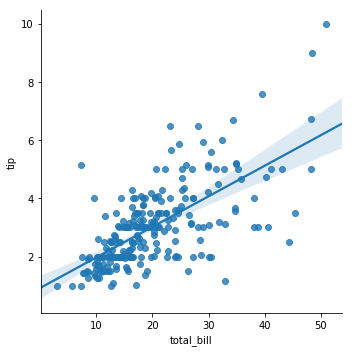

In [5]:
sns.lmplot('total_bill','tip',tips)

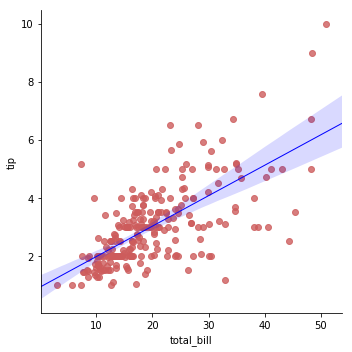

In [9]:
# use dictionary to edit the plot
sns.lmplot('total_bill','tip',tips,
          scatter_kws = {'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

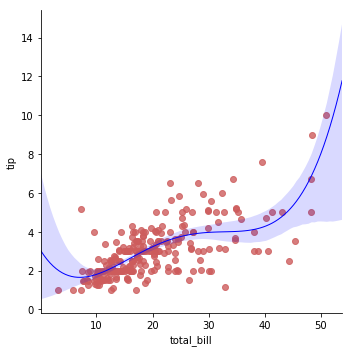

In [10]:
# quadratic fit
sns.lmplot('total_bill','tip',tips,order=4,
          scatter_kws = {'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

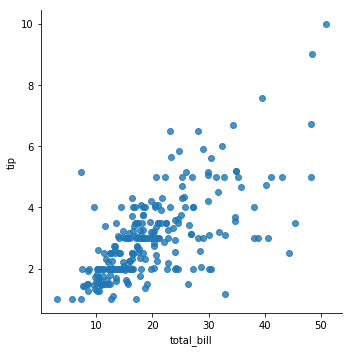

In [11]:
# just scatter plot
sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tips['tip_pect'] = tips.tip/tips.total_bill*100

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


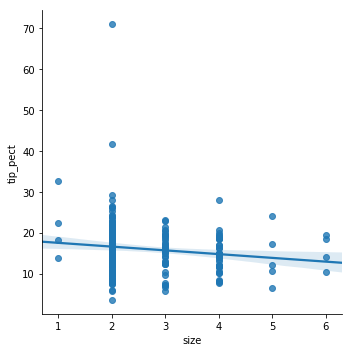

In [16]:
sns.lmplot('size','tip_pect',tips)

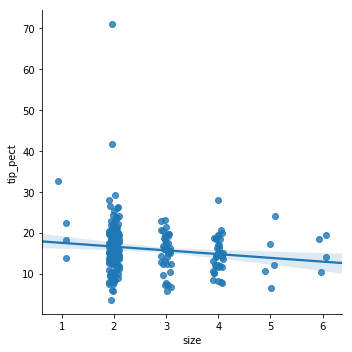

In [17]:
# add jitter - making points to not overlap each other, 
# easier to read

sns.lmplot('size','tip_pect',tips,x_jitter=0.1)

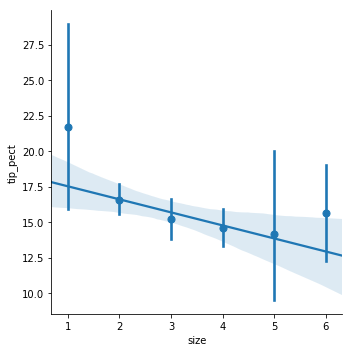

In [18]:
# tendency of each bin
sns.lmplot('size','tip_pect',tips, x_estimator=np.mean)
# 

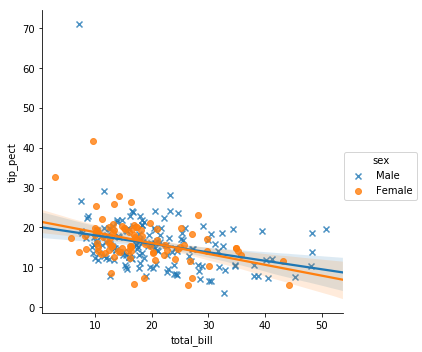

In [19]:
# hue facet - define subset along a column
sns.lmplot('total_bill','tip_pect',tips, hue ='sex',markers =['x','o'])

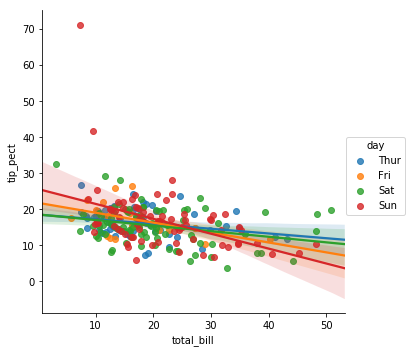

In [20]:
sns.lmplot('total_bill','tip_pect',tips,hue = 'day')

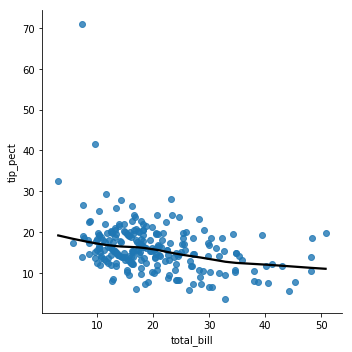

In [22]:
# local regression model fitting
# loess
sns.lmplot('total_bill','tip_pect',tips,lowess = True,
          line_kws={'color':'black'})

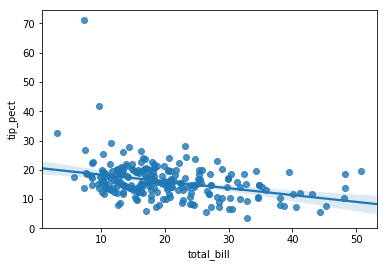

In [23]:
# lower level function that lmplot was built upon
# regplot more robust
# regplot can be in subplot
sns.regplot('total_bill','tip_pect',tips)

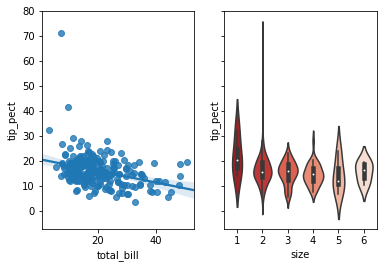

In [44]:
# call for subplot
fig,(axis1,axis2) = plt.subplots(1,2,sharey=True)
sns.regplot('total_bill','tip_pect',tips,ax =axis1)
sns.violinplot(x =tips['size'],y =tips['tip_pect'],palette = 'Reds_r',ax=axis2)
